EDA ( Análisis Exploratorio de Datos) <br>

En este notebook se trabajará con el siguiente enfoque del EDA, separandolo en 2 partes:
*   1) Calidad del dato
*   2) Análisis de los datos para el enfoque de relaciones; indagar sobre los datos.

Este notebook, analizará la calidad del dato y dejará disponibles los datos en nuevos CSV listos
para ser utilizados en la segunda parte del EDA y en los dashboards de Power BI.

*Nota:* La primera parte del notebook puede parecer un poco repetitiva por que es pura limpieza de datos<br>
pero posterior a esto es cuando se realizan las gráficas de análisis y de patrones como segunda parte de este <br>
notebook

In [1]:
import pandas as pd
import helper as hp
import matplotlib.pyplot as plt
import seaborn as sns

* EDA Para hacer análisis de la Calidad del dato

Principalmente se tomará el enfoque de contemplar outliers, valores nulos y valores duplicados, <br>
se revisará la calidad de los datos con funciones que se desarrollaron en el archivo helper.py <br>
y con gráficos acorde a las variables.

In [2]:
df_Accesos_Cien = pd.read_excel('data/Internet_Penetracion.xlsx')

In [3]:
df_Accesos_Cien.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [4]:
# Se utiliza la funcion data_overview que nos permite tener un vistazo de nulos, tipo de dato y lo que se observa 
# en la salida
hp.data_overview(df_Accesos_Cien)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.0,0.0,0
1,Trimestre,[<class 'int'>],100.0,0.0,0
2,Provincia,[<class 'str'>],100.0,0.0,0
3,Accesos por cada 100 hogares,[<class 'float'>],100.0,0.0,0


In [5]:
# Se presenta el porcentaje de outliers utilizando la función outliers_percentage
hp.outliers_percentage(df_Accesos_Cien,'Accesos por cada 100 hogares')

Total de outliers en Accesos por cada 100 hogares: 9 de 864 registros -- 1.04 %


- Enfoque sobre outliers: <br>
La cantidad de outliers representa menos de un 5% y representan valores reales para la cantidad <br>
de accesos, el enfoque que se toma es de no eliminarlos. Ya que, al final si una provincia tiene <br>
la mayor cantidad de accesos es algo coherente que se dejen los valores que representan esa <br>
cantidad que es mayor en comparación del resto de los datos y viceversa para el caso de valores menores.

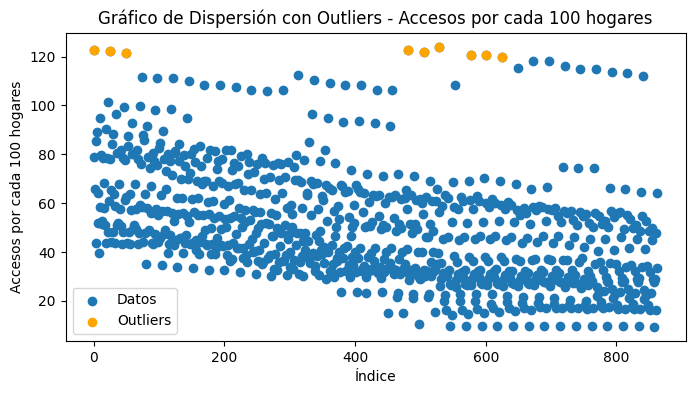

In [6]:
# Se calculan los outliers con la funcion que se contruyó en el helper.py
columna_A100 = 'Accesos por cada 100 hogares'
outliers = hp.calculate_outliers(df_Accesos_Cien,'Accesos por cada 100 hogares')

# Se crea un gráfico de dispersión resaltando los outliers
plt.figure(figsize=(8, 4))
plt.scatter(df_Accesos_Cien.index, df_Accesos_Cien[columna_A100], label='Datos')
plt.scatter(outliers.index, outliers[columna_A100], color='orange', label='Outliers')
plt.title(f'Gráfico de Dispersión con Outliers - {columna_A100}')
plt.xlabel('Índice')
plt.ylabel(f'{columna_A100}')
plt.legend()
plt.show()

Antes de revisar cada archivo, se realizó un primer vistazo para los datos y se concluyó que para la <br>
mayoría, los valores duplicados son irrelevantes, ya que; por ejemplo en este caso las provincias estarán <br>
repetidas 4 veces porque es un análisis trimestral, lo mismo para las demás columnas y para la cantidad de <br>
accesos, no representa algo malo tener valores duplicados, sería una coincidencia que distintas provincias <br>
tengan la misma cantidad de accesos, por lo cual eliminar duplicados sería erroneo. En caso de que los <br>
duplicados fueran algo significativo se mencionará, pero a primer vistazo se tiene esta perspectiva.

In [7]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_Accesos_Cien_ruta = 'data/df_Accesos_Cien.csv'
df_Accesos_Cien.to_csv(df_Accesos_Cien_ruta, index=False)

In [8]:
df_Accesos_BAF = pd.read_excel('data/Internet_BAF.xlsx')

In [9]:
df_Accesos_BAF.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [10]:
# Se tiene un primer vistazo sobre los datos
hp.data_overview(df_Accesos_BAF)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.00,0.00,0
1,Trimestre,[<class 'int'>],100.00,0.00,0
2,Provincia,[<class 'str'>],100.00,0.00,0
3,Banda ancha fija,[<class 'int'>],100.00,0.00,0
4,Dial up,[<class 'float'>],99.77,0.23,2
5,Total,[<class 'int'>],100.00,0.00,0


In [11]:
# Dado que es un porcentaje muy bajo de nulos se eliminan
df_Accesos_BAF.dropna(inplace=True)

In [12]:
hp.outliers_percentage(df_Accesos_BAF,'Banda ancha fija')

Total de outliers en Banda ancha fija: 36 de 862 registros -- 4.18 %


Se conserva el mismo enfoque mencionado arriba sobre los outliers(en "Enfoque sobre outliers")

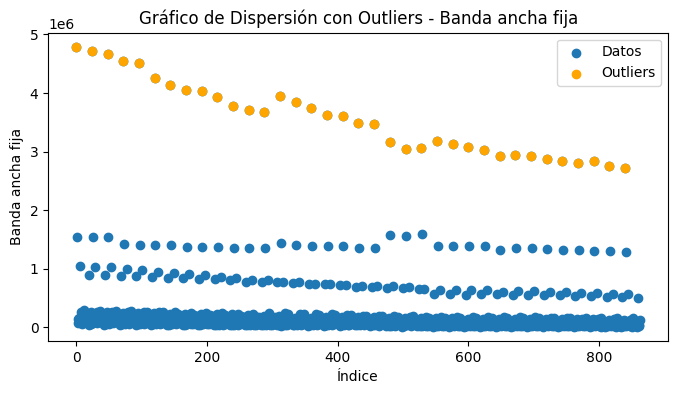

In [13]:
# Se calculan los outliers con la funcion que se contruyó en el helper.py
columna_BA = 'Banda ancha fija'
outliers_BA = hp.calculate_outliers(df_Accesos_BAF,columna_BA)

# Se crea un gráfico de dispersión resaltando los outliers
plt.figure(figsize=(8, 4))
plt.scatter(df_Accesos_BAF.index, df_Accesos_BAF[columna_BA], label='Datos')
plt.scatter(outliers_BA.index, outliers_BA[columna_BA], color='orange', label='Outliers')
plt.title(f'Gráfico de Dispersión con Outliers - {columna_BA}')
plt.xlabel('Índice')
plt.ylabel(f'{columna_BA}')
plt.legend()
plt.show()

In [14]:
hp.outliers_percentage(df_Accesos_BAF,'Dial up')

Total de outliers en Dial up: 33 de 862 registros -- 3.83 %


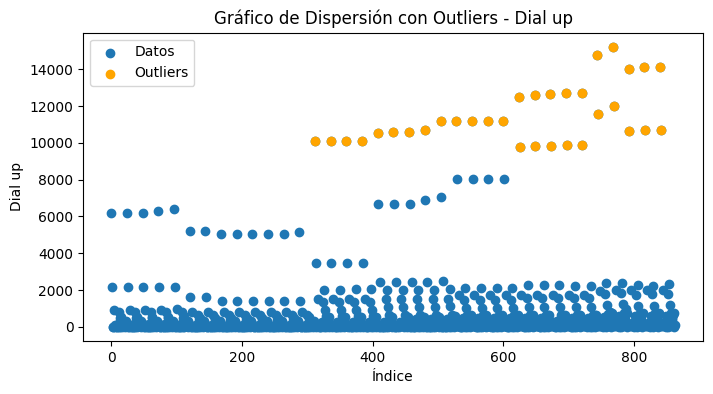

In [15]:
# Se calculan los outliers con la funcion que se contruyó en el helper.py
columna_DU = 'Dial up'
outliers_DU = hp.calculate_outliers(df_Accesos_BAF,columna_DU)

# Se crea un gráfico de dispersión resaltando los outliers
plt.figure(figsize=(8, 4))
plt.scatter(df_Accesos_BAF.index, df_Accesos_BAF[columna_DU], label='Datos')
plt.scatter(outliers_DU.index, outliers_DU[columna_DU], color='orange', label='Outliers')
plt.title(f'Gráfico de Dispersión con Outliers - {columna_DU}')
plt.xlabel('Índice')
plt.ylabel(f'{columna_DU}')
plt.legend()
plt.show()

In [16]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_Accesos_BAF_ruta = 'data/df_Accesos_BAF.csv'
df_Accesos_BAF.to_csv(df_Accesos_BAF_ruta, index=False)

In [17]:
df_Accesos_xTec = pd.read_excel('data/Internet_Accesos-por-tecnologia.xlsx')

In [18]:
df_Accesos_xTec.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759


In [19]:
hp.data_overview(df_Accesos_xTec)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
1,Trimestre,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
2,Provincia,[<class 'str'>],100.0,0.0,0
3,ADSL,[<class 'int'>],100.0,0.0,0
4,Cablemodem,[<class 'int'>],100.0,0.0,0
5,Fibra óptica,[<class 'int'>],100.0,0.0,0
6,Wireless,[<class 'int'>],100.0,0.0,0
7,Otros,[<class 'int'>],100.0,0.0,0
8,Total,[<class 'int'>],100.0,0.0,0


Se puede observar que año y trimestre tienen tanto entero como string, entrando a revisar la data <br>
se topa con que para el año 2019 algunos valores de año y trimestre están así: 2019* y 3* <br>
respectivamente.

In [20]:
# Función para eliminar el asterisco y convertir a entero
def limpiar_y_convertir(valor):
    try:
        # Eliminar asterisco y convertir a entero
        return int(valor.replace('*', '').strip())
    except:
        return valor  # Si hay un error, devolver el valor original

# Aplicar la función a las columnas de Año y Trimestre
df_Accesos_xTec['Año'] = df_Accesos_xTec['Año'].apply(limpiar_y_convertir)
df_Accesos_xTec['Trimestre'] = df_Accesos_xTec['Trimestre'].apply(limpiar_y_convertir)

In [21]:
# Se revisa que hayan tenido efecto los cambios, se debería observar ambas columnas en entero únicamente
hp.data_overview(df_Accesos_xTec)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.0,0.0,0
1,Trimestre,[<class 'int'>],100.0,0.0,0
2,Provincia,[<class 'str'>],100.0,0.0,0
3,ADSL,[<class 'int'>],100.0,0.0,0
4,Cablemodem,[<class 'int'>],100.0,0.0,0
5,Fibra óptica,[<class 'int'>],100.0,0.0,0
6,Wireless,[<class 'int'>],100.0,0.0,0
7,Otros,[<class 'int'>],100.0,0.0,0
8,Total,[<class 'int'>],100.0,0.0,0


In [22]:
# Ya que representan menos del 1% se procede a eliminar los nulos
df_Accesos_xTec.dropna(inplace=True)

A partir de esta parte del EDA, se utilizará la funcion de outliers del helper, se dejarán de mostrar graficos de<br>
dispersión para no llenar de tanto grafico y en su lugar se va a utilizar esa funcion para tener un vistazo <br>
rapido, igulamente representan un porcentaje pequeño de los datos, en caso de ser necesario se mostrará alguna <br>
gráfica de dispersion o boxplot

In [23]:
# Revisamos lo outliers de algunas columnas para observar porcentajes
outliers_columns = ['ADSL','Cablemodem','Fibra óptica','Wireless','Otros']
for c in outliers_columns:
    hp.outliers_percentage(df_Accesos_xTec,c)
    print("-"*66)

Total de outliers en ADSL: 23 de 864 registros -- 2.66 %
------------------------------------------------------------------
Total de outliers en Cablemodem: 24 de 864 registros -- 2.78 %
------------------------------------------------------------------
Total de outliers en Fibra óptica: 13 de 864 registros -- 1.5 %
------------------------------------------------------------------
Total de outliers en Wireless: 22 de 864 registros -- 2.55 %
------------------------------------------------------------------
Total de outliers en Otros: 14 de 864 registros -- 1.62 %
------------------------------------------------------------------


In [24]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_Accesos_xTec_ruta = 'data/df_Accesos_xTec.csv'
df_Accesos_xTec.to_csv(df_Accesos_xTec_ruta, index=False)

In [25]:
df_Historico_Vel = pd.read_excel('data/historico_velocidad_internet.xlsx')

In [26]:
df_Historico_Vel.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [27]:
hp.data_overview(df_Historico_Vel)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.0,0.0,0
1,Trimestre,[<class 'int'>],100.0,0.0,0
2,Provincia,[<class 'str'>],100.0,0.0,0
3,Mbps (Media de bajada),[<class 'float'>],100.0,0.0,0


In [28]:
# Revisamos outliers para la columna Mbps
hp.outliers_percentage(df_Historico_Vel,'Mbps (Media de bajada)')

Total de outliers en Mbps (Media de bajada): 20 de 864 registros -- 2.31 %


In [29]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_Historico_Vel_ruta = 'data/df_Historico_Vel.csv'
df_Historico_Vel.to_csv(df_Historico_Vel_ruta, index=False)

In [30]:
df_Accesos_xVel = pd.read_excel('data/Internet_Accesos-por-velocidad.xlsx')

In [31]:
df_Accesos_xVel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


In [32]:
hp.data_overview(df_Accesos_xVel)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.00,0.00,0
1,Trimestre,[<class 'int'>],100.00,0.00,0
2,Provincia,[<class 'str'>],100.00,0.00,0
3,HASTA 512 kbps,[<class 'float'>],100.00,0.00,0
4,+ 512 Kbps - 1 Mbps,[<class 'float'>],100.00,0.00,0
5,+ 1 Mbps - 6 Mbps,[<class 'float'>],100.00,0.00,0
6,+ 6 Mbps - 10 Mbps,[<class 'float'>],100.00,0.00,0
7,+ 10 Mbps - 20 Mbps,[<class 'float'>],100.00,0.00,0
8,+ 20 Mbps - 30 Mbps,[<class 'float'>],100.00,0.00,0
9,+ 30 Mbps,[<class 'float'>],100.00,0.00,0


In [33]:
# Los nulos no llegan a 1% por lo cual se procede a eliminarlos
df_Accesos_xVel.dropna(inplace=True)

In [34]:
# Revisamos lo outliers de algunas columnas para observar porcentajes
outliers_columns_vel = df_Accesos_xVel.drop(columns=['Año','Trimestre','Provincia'])
for c_vel in outliers_columns_vel:
    hp.outliers_percentage(df_Accesos_xVel,c_vel)
    print("-"*66)


Total de outliers en HASTA 512 kbps: 4 de 858 registros -- 0.47 %
------------------------------------------------------------------
Total de outliers en + 512 Kbps - 1 Mbps: 30 de 858 registros -- 3.5 %
------------------------------------------------------------------
Total de outliers en + 1 Mbps - 6 Mbps: 23 de 858 registros -- 2.68 %
------------------------------------------------------------------
Total de outliers en + 6 Mbps - 10 Mbps: 29 de 858 registros -- 3.38 %
------------------------------------------------------------------
Total de outliers en + 10 Mbps - 20 Mbps: 21 de 858 registros -- 2.45 %
------------------------------------------------------------------
Total de outliers en + 20 Mbps - 30 Mbps: 14 de 858 registros -- 1.63 %
------------------------------------------------------------------
Total de outliers en + 30 Mbps: 18 de 858 registros -- 2.1 %
------------------------------------------------------------------
Total de outliers en OTROS: 10 de 858 registros 

In [35]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_Accesos_xVel_ruta = 'data/df_Accesos_xVel.csv'
df_Accesos_xVel.to_csv(df_Accesos_xVel_ruta, index=False)

In [36]:
df_ingresos_internet = pd.read_excel('data/Internet_Ingresos.xlsx')

In [37]:
df_ingresos_internet.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [38]:
hp.data_overview(df_ingresos_internet)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.0,0.0,0
1,Trimestre,[<class 'int'>],100.0,0.0,0
2,Ingresos (miles de pesos),[<class 'float'>],100.0,0.0,0
3,Periodo,[<class 'str'>],100.0,0.0,0


In [39]:
hp.outliers_percentage(df_ingresos_internet,'Ingresos (miles de pesos)')

Total de outliers en Ingresos (miles de pesos): 0 de 36 registros -- 0.0 %


In [40]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_ingresos_ruta = 'data/df_ingresos_internet.csv'
df_ingresos_internet.to_csv(df_ingresos_ruta, index=False)

In [41]:
df_tec_localidad = pd.read_excel('data/Internet-Accesos-por-tecno_por_loc.xlsx')

In [42]:
df_tec_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [43]:
hp.data_overview(df_tec_localidad)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Provincia,[<class 'str'>],100.0,0.0,0
1,Partido,[<class 'str'>],100.0,0.0,0
2,Localidad,[<class 'str'>],100.0,0.0,0
3,Link Indec,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
4,ADSL,[<class 'int'>],100.0,0.0,0
5,CABLEMODEM,[<class 'int'>],100.0,0.0,0
6,DIAL UP,[<class 'int'>],100.0,0.0,0
7,FIBRA OPTICA,[<class 'int'>],100.0,0.0,0
8,OTROS,[<class 'int'>],100.0,0.0,0
9,SATELITAL,[<class 'int'>],100.0,0.0,0


Para terminos del analisis que se presentará utilizaremos unicamente Provincias, por lo cual <br>
se puede eliminar localidad y Link Indec que no serán útiles para el análisis

In [44]:
df_tec_localidad.drop(columns=['Localidad','Link Indec'],inplace=True)

In [45]:
# Revisamos lo outliers de algunas columnas para observar porcentajes
outliers_tec = df_tec_localidad.drop(columns=['Provincia','Partido'])
for c_tec in outliers_tec:
    hp.outliers_percentage(df_tec_localidad,c_tec)
    print("-"*66)

Total de outliers en ADSL: 16 de 3137 registros -- 0.51 %
------------------------------------------------------------------
Total de outliers en CABLEMODEM: 10 de 3137 registros -- 0.32 %
------------------------------------------------------------------
Total de outliers en DIAL UP: 17 de 3137 registros -- 0.54 %
------------------------------------------------------------------
Total de outliers en FIBRA OPTICA: 24 de 3137 registros -- 0.77 %
------------------------------------------------------------------
Total de outliers en OTROS: 15 de 3137 registros -- 0.48 %
------------------------------------------------------------------
Total de outliers en SATELITAL: 4 de 3137 registros -- 0.13 %
------------------------------------------------------------------
Total de outliers en WIMAX: 10 de 3137 registros -- 0.32 %
------------------------------------------------------------------
Total de outliers en WIRELESS: 29 de 3137 registros -- 0.92 %
----------------------------------------

In [46]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_tec_localidad_ruta = 'data/df_tec_localidad.csv'
df_tec_localidad.to_csv(df_tec_localidad_ruta, index=False)

Hasta este punto del EDA, puede parecer un poco repetitivo el procedimiento por cada dataframe <br>
aunque aparenta que todo anda bastante limpio en la API que nos proporcionaron, es necesario estos pasos <br>
para asegurar la calidad del dato y despues, al final de este notebook se pueden ver los <br>
gráficos sobre el analisis de los datos y sobre las visualizaciones.

In [47]:
df_conect_map = pd.read_excel('data/mapa_conectividad.xlsx')

In [48]:
df_conect_map.head(2)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136


In [49]:
hp.data_overview(df_conect_map)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Provincia,[<class 'str'>],100.00,0.00,0
1,Partido,[<class 'str'>],100.00,0.00,0
2,Localidad,[<class 'str'>],100.00,0.00,0
3,Población,[<class 'int'>],100.00,0.00,0
4,ADSL,[<class 'str'>],100.00,0.00,0
5,Cablemódem,[<class 'str'>],100.00,0.00,0
6,Dial Up,[<class 'str'>],100.00,0.00,0
7,Fibra óptica,[<class 'str'>],100.00,0.00,0
8,Satelital,[<class 'str'>],100.00,0.00,0
9,Wireless,[<class 'str'>],100.00,0.00,0


In [50]:
# Se procede a eliminar duplicados ya que representa el 0.28 por ciento
df_conect_map.dropna(inplace=True)

In [51]:
# Se procede a eliminar localidad y link, sustentado en lo comentado anteriormente
df_conect_map.drop(columns=['Localidad','Link'],inplace=True)

Ahora como se ve en el .head y revisando el archivo, los valores posibles son "--" para "No aplica"<br>
y los valores "SI", son los dos posibles valores. Por lo cual, se cambiará esas columnas a booleanas<br>
es como cuando se hace one-hot-encoding

In [52]:
# Se obtienen las columnas que NO se modificarán
columns_to_exclude = ['Longitud', 'Latitud', 'Población', 'Partido', 'Provincia']

# Se reemplaza '--' por 0 y 'SI' por 1 en todas las columnas, excepto en las columnas excluidas
df_conect_map[df_conect_map.columns.difference(columns_to_exclude)] = df_conect_map[df_conect_map.columns.difference(columns_to_exclude)].replace({'--': 0, 'SI': 1})
# Se convierte a valores booleanos
df_conect_map[df_conect_map.columns.difference(columns_to_exclude)] = df_conect_map[df_conect_map.columns.difference(columns_to_exclude)].astype(bool)


In [53]:
# Se corroboran los cambios realizados
hp.data_overview(df_conect_map)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Provincia,[<class 'str'>],100.0,0.0,0
1,Partido,[<class 'str'>],100.0,0.0,0
2,Población,[<class 'int'>],100.0,0.0,0
3,ADSL,[<class 'bool'>],100.0,0.0,0
4,Cablemódem,[<class 'bool'>],100.0,0.0,0
5,Dial Up,[<class 'bool'>],100.0,0.0,0
6,Fibra óptica,[<class 'bool'>],100.0,0.0,0
7,Satelital,[<class 'bool'>],100.0,0.0,0
8,Wireless,[<class 'bool'>],100.0,0.0,0
9,Telefonía Fija,[<class 'bool'>],100.0,0.0,0


In [54]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_conect_map_ruta = 'data/df_conect_map.csv'
df_conect_map.to_csv(df_conect_map_ruta, index=False)

Para futuros análisis y el dashboard se pretende agrupar ciertas columnas de interes para hacer <br>
un mapa con la latitud y longitud y ciertos valores como 3G, 4G y fibra óptica. Para lo cual, se <br>
realiza el siguiente script

In [55]:
# Se agrupan los datos por provincia y realiza la suma de 3G, 4G, y fibra óptica
grouped_data_map = df_conect_map.groupby('Provincia').agg({
    '3G': 'sum',
    '4G': 'sum',
    'Fibra óptica': 'sum',
    'Latitud': 'first',
    'Longitud': 'first'
}).reset_index()

# Se renombra las columnas para mayor claridad
grouped_data_map = grouped_data_map.rename(columns={'3G': 'Total_3G', '4G': 'Total_4G', 'Fibra óptica': 'Total_Fibra'})

In [56]:
grouped_data_map.head(2)

,Provincia,Total_3G,Total_4G,Total_Fibra,Latitud,Longitud
0,BUENOS AIRES,590,655,463,-35.292982,-61.407254
1,CABA,48,48,48,-34.582110,-58.503485


In [57]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
grouped_data_map_ruta = 'data/grouped_data_map.csv'
grouped_data_map.to_csv(grouped_data_map_ruta, index=False)

In [58]:
df_vel_localidad = pd.read_excel('data/Internet_Accesos-por-velocidad_por loc.xlsx')

In [59]:
df_vel_localidad.head(2)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0


In [60]:
hp.data_overview(df_vel_localidad)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Provincia,[<class 'str'>],100.00,0.00,0
1,Partido,[<class 'str'>],100.00,0.00,0
2,Localidad,[<class 'str'>],100.00,0.00,0
3,Link Indec,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
4,Otros,[<class 'float'>],31.08,68.92,2133
...,...,...,...,...,...
129,900 Mbps,[<class 'float'>],0.03,99.97,3094
130,950 Mbps,[<class 'float'>],0.03,99.97,3094
131,1000 Mbps,[<class 'float'>],11.11,88.89,2751
132,1024 Mbps,[<class 'float'>],0.03,99.97,3094


In [61]:
#En este caso es normal que haya Nulos porque es similar a cuando se hace un one-hot-encoding, habrán
#valores en cero que no son nulos. Por lo cual se cambiarán todos los nulos por ceros para que no sumen en el total
null_columns = [col for col in df_vel_localidad.columns if col not in ['Provincia', 'Partido', 'Localidad', 'Link Indec']]

# Reemplazar nulos por ceros en columnas específicas
df_vel_localidad[null_columns] = df_vel_localidad[null_columns].fillna(0)


In [62]:
hp.data_overview(df_vel_localidad)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Provincia,[<class 'str'>],100.0,0.0,0
1,Partido,[<class 'str'>],100.0,0.0,0
2,Localidad,[<class 'str'>],100.0,0.0,0
3,Link Indec,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
4,Otros,[<class 'float'>],100.0,0.0,0
...,...,...,...,...,...
129,900 Mbps,[<class 'float'>],100.0,0.0,0
130,950 Mbps,[<class 'float'>],100.0,0.0,0
131,1000 Mbps,[<class 'float'>],100.0,0.0,0
132,1024 Mbps,[<class 'float'>],100.0,0.0,0


In [63]:
# Se procede a eliminar localidad y Link Indec, sustentado en lo comentado anteriormente
df_vel_localidad.drop(columns=['Link Indec','Localidad'],inplace=True)

In [64]:
df_vel_localidad.head(2)

,Provincia,Partido,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,0.0,0.0,0.0,2.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6208.0
1,BUENOS AIRES,25 de Mayo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [65]:
# Se exporta el dataset a CSV para tenerlo disponible para el 2do EDA y los dashboards
df_vel_localidad_ruta = 'data/df_vel_localidad.csv'
df_vel_localidad.to_csv(df_vel_localidad_ruta, index=False)

* Datos Complementarios: 

Se tomó la decisión de hacer un breve análisis para los datos de Quejas <br>
y para los datos de Telefonía, se ingresarán algunos datasets para tomarlos en cuenta en este EDA

In [66]:
# Se ingresan los accesos para telefonía
df_Accesos_Tel = pd.read_excel('data/telefonia_fija.xlsx')

In [67]:
df_Accesos_Tel.head()

,Año,Trimestre,Provincia,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
0,2014,1,Buenos Aires,26.717541,85.264880
1,2014,1,Capital Federal,52.663108,128.570341
2,2014,1,Catamarca,10.034940,39.446596
3,2014,1,Chaco,9.094093,34.022053
4,2014,1,Chubut,17.657914,57.594630


In [68]:
# Se tiene un vistazo general de los datos
hp.data_overview(df_Accesos_Tel)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.0,0.0,0
1,Trimestre,[<class 'int'>],100.0,0.0,0
2,Provincia,[<class 'str'>],100.0,0.0,0
3,Accesos telefonía fija por cada 100 hab,[<class 'float'>],100.0,0.0,0
4,Accesos telefonía fija por cada 100 hogares,[<class 'float'>],100.0,0.0,0


In [69]:
# Se procede a eliminar la columna de por cada 100 habitantes ya que para los análisis se está utilizando 100 hogares
df_Accesos_Tel.drop(columns='Accesos telefonía fija por cada 100 hab',inplace=True)

In [70]:
# Se tiene un vistazo de los outliers para la columna por cada 100 hogares
hp.outliers_percentage(df_Accesos_Tel,'Accesos telefonía fija por cada 100 hogares')

Total de outliers en Accesos telefonía fija por cada 100 hogares: 26 de 864 registros -- 3.01 %


In [71]:
# Se mantiene el enfoque tomado anteriormente para outliers y se deja disponible el csv para futuras gráficas
df_Accesos_Tel_ruta = 'data/df_Accesos_Telefonia.csv'
df_Accesos_Tel.to_csv(df_Accesos_Tel_ruta, index=False)

In [72]:
# Se ingresa la data de ingresos por telefonía
df_ingresos_Tel = pd.read_excel('data/telefonia_fija_ingresos.xlsx')

In [73]:
df_ingresos_Tel.head()

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,2916071.754
1,2014,2,2974865.204
2,2014,3,3105462.022
3,2014,4,3339690.895
4,2015,1,3260124.752


In [74]:
# Se tiene un vistazo inicial de la calidad de los datos
hp.data_overview(df_ingresos_Tel)

,nombre_campo,tipo_datos,NO_nulos_%,nulos_%,nulos_cantidad
0,Año,[<class 'int'>],100.0,0.0,0
1,Trimestre,[<class 'int'>],100.0,0.0,0
2,Ingresos (miles de $),[<class 'float'>],100.0,0.0,0


In [75]:
# Se tiene un vistazo de los outliers
hp.outliers_percentage(df_ingresos_Tel,'Ingresos (miles de $)')

Total de outliers en Ingresos (miles de $): 0 de 36 registros -- 0.0 %


In [76]:
# Se deja disponible el dataset para futuras gráficas y análisis
df_ingresos_Tel_ruta = 'data/df_ingresos_Tel.csv'
df_ingresos_Tel.to_csv(df_ingresos_Tel_ruta, index=False)

In [77]:
# Se ingresan datos referentes a la cantidad de reclamos por cada Servicio
df_reclamo_servicio = pd.read_excel('data/reclamo_servicio_total.xlsx')

In [78]:
df_reclamo_servicio

,Servicio,Cantidad
0,Servicio de Telefonía Fija,7754
1,Internet,4874
2,Servicios Comunicaciones Moviles,2335
3,Cable,993


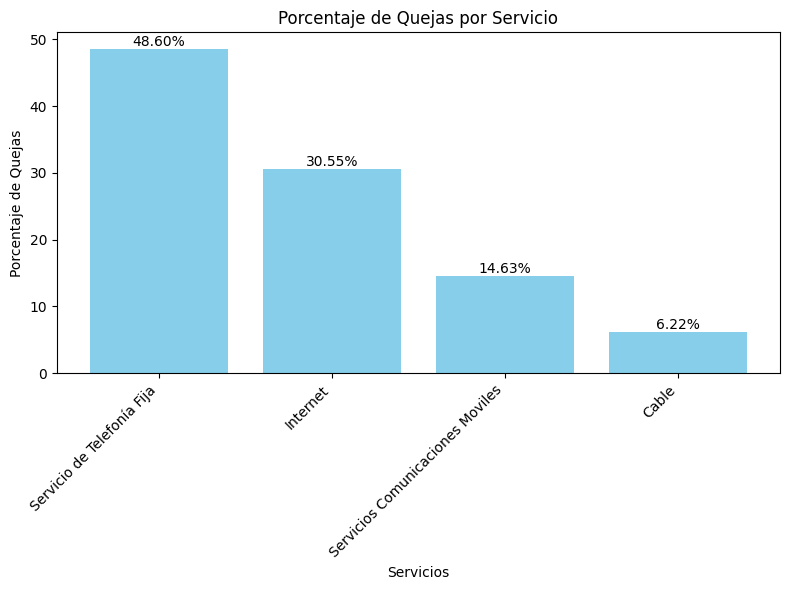

In [79]:
# Dado que lo que vemos en la salida anterior es toda la cantidad de datos, directamente se hará una gráfica
# con los porcentajes que representa cada cantidad

# Cálculo de porcentajes
total_quejas = sum(df_reclamo_servicio['Cantidad'])
porcentajes = [(cant / total_quejas) * 100 for cant in df_reclamo_servicio['Cantidad']]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_reclamo_servicio['Servicio'], porcentajes, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Servicios')
plt.ylabel('Porcentaje de Quejas')
plt.title('Porcentaje de Quejas por Servicio')

# Mostrar los porcentajes en las barras
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje, f'{porcentaje:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En este punto cabe mencionar que para el storytelling y para términos de la información<br>
presentada en el dashboard, únicamente se trabajará con Internet(los datasets principales del github)<br>
y con Telefonía fija. Esto porque, son los servicios con mayor cantidad de quejas y para presentar<br>
información y de cierta forma KPI´s que mejoren el negocio y como consecuencia disminuyan las quejas.

In [80]:
# Se deja disponible el dataset para futuros gráficos
df_reclamo_servicio_ruta = 'data/df_reclamo_servicio.csv'
df_reclamo_servicio.to_csv(df_reclamo_servicio_ruta, index=False)

In [81]:
#Finalmente, para concluir con esta primera etapa del EDA, se ingresa la cantidad de quejas
#Por tipo de queja
df_reclamos_tipo = pd.read_excel('data/Reclamos_por_tipo.xlsx')

In [82]:
df_reclamos_tipo.head()

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2023,1,1240,504,407,105,2256
1,2023,2,1140,468,393,91,2092
2,2023,3,1384,633,433,168,2618
3,2023,4,842,440,294,106,1682
4,2023,5,777,434,293,94,1598


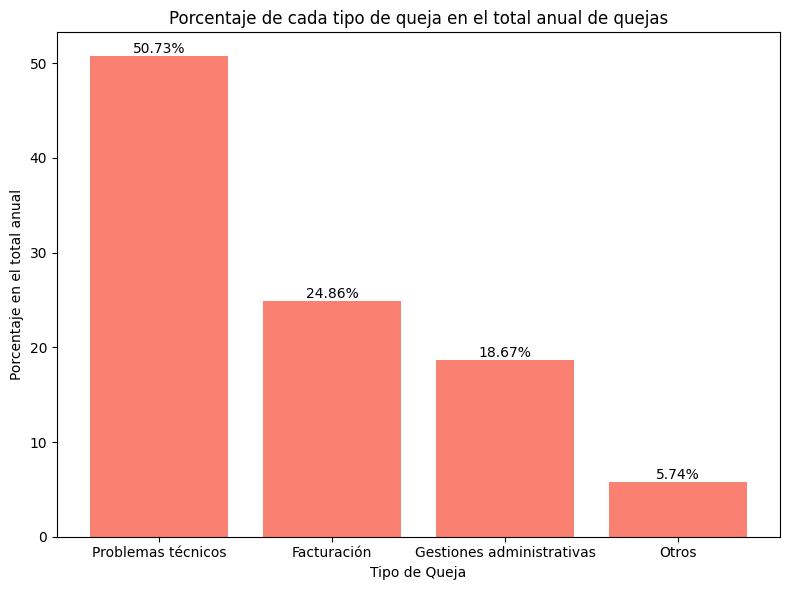

In [83]:
# Sumar el total anual para cada tipo de queja
total_por_tipo = df_reclamos_tipo[['Problemas técnicos', 'Facturación', 'Gestiones administrativas', 'Otros']].sum()

# Calcular el porcentaje para cada tipo de queja respecto al total anual
total_anual = total_por_tipo.sum()
porcentaje_por_tipo = (total_por_tipo / total_anual) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(porcentaje_por_tipo.index, porcentaje_por_tipo, color='salmon')

# Añadir etiquetas y título
plt.xlabel('Tipo de Queja')
plt.ylabel('Porcentaje en el total anual')
plt.title('Porcentaje de cada tipo de queja en el total anual de quejas')

# Mostrar los porcentajes en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [84]:
# Se deja disponible el dataset para futuros gráficos
df_reclamos_tipo_ruta = 'data/df_reclamos_tipo.csv'
df_reclamos_tipo.to_csv(df_reclamos_tipo_ruta, index=False)

Ahora se comenzará con la 2da Parte el EDA: <br>

*   2) Análisis de los datos para el enfoque de relaciones; indagar sobre los datos.



Primero se va a graficar la cantidad de accesos que hay por tecnología

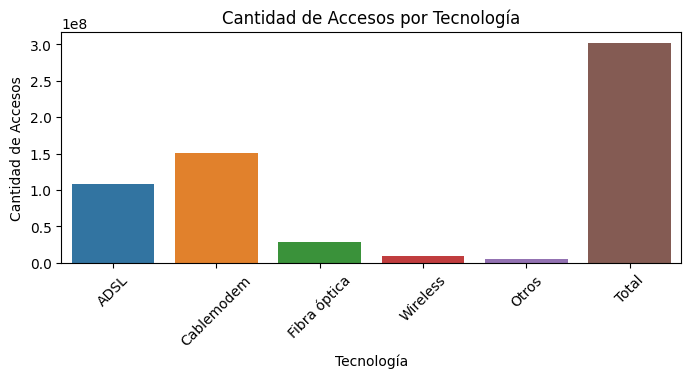

In [85]:
# Se colapsa las columnas de tecnología para tener una sola columna con el nombre de la tecnología
df_melted = df_Accesos_xTec.melt(id_vars=['Año', 'Trimestre', 'Provincia'], var_name='Tecnología', value_name='Accesos')

# Se crea un countplot con Seaborn
plt.figure(figsize=(8, 3))
sns.barplot(data=df_melted, x='Tecnología', y='Accesos', estimator=sum, errorbar=None)  # Usamos un barplot con el estimador de suma
plt.title('Cantidad de Accesos por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45) 
plt.show()

Ahora se tomará un vistazo de como ha cambiado la cantidad de accesos para las 4 primeras tecnologías<br>
respecto a los años

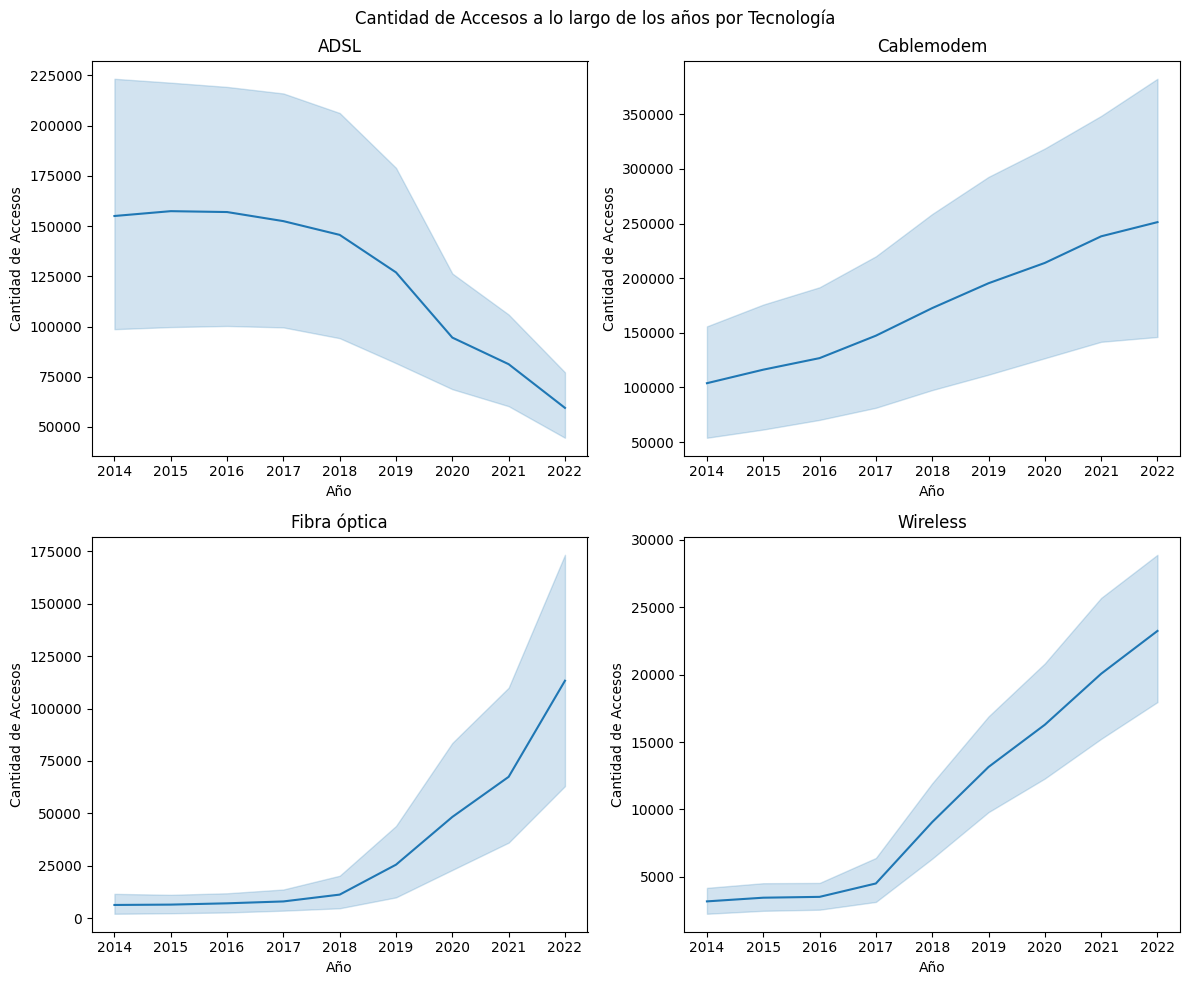

In [93]:
# Se seleccionan las tecnologías de interés (ADSL, Cablemodem, Fibra óptica, Wireless)
tecnologias_interes = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']

# Se filtra el DataFrame para obtener solo las tecnologías de interés + el Año
df_tecnologias_interes = df_Accesos_xTec[['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']]

# Se organiza el DataFrame para el gráfico
df_tecnologias_interes_melted = df_tecnologias_interes.melt(id_vars='Año', var_name='Tecnología', value_name='Accesos')

# Se arman los subplots para cada tecnología
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Cantidad de Accesos a lo largo de los años por Tecnología')

# Se itera sobre las tecnologías y se grafica
for i, tecnologia in enumerate(tecnologias_interes):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    sns.lineplot(data=df_tecnologias_interes_melted[df_tecnologias_interes_melted['Tecnología'] == tecnologia], x='Año', y='Accesos', ax=ax)
    
    ax.set_title(tecnologia)
    ax.set_xlabel('Año')
    ax.set_ylabel('Cantidad de Accesos')

plt.tight_layout()
plt.show()

Se utilizó sns.lineplot, que por defecto realiza una agregación de los datos y muestra la línea del promedio <br>
de los valores en cada año para cada tecnología. Por eso es que la gráfica en la cantidad de accesos muestra<br> promedios. Por otra parte se pueden observar entre otras cosas que; para ADSL fue reduciendo la cantidad de <br>
accesos promedio por año y que para fibra óptica comenzó a haber un incremento notable a partir de 2018 en <br>
adelante. Los gráficos muestran por otra parte que el número de conexiones para ADSL y Cablemodem está disminuyendo o se está estancando con el tiempo, mientras que el número de conexiones para Fibra Óptica y Wireless está aumentando con el tiempo.

Ahora se va a indagar cual es la cantidad de accesos por provincia, cuál es el Top 5 con mayor cantidad <br>
y cual es el top 5 con menor cantidad de accesos

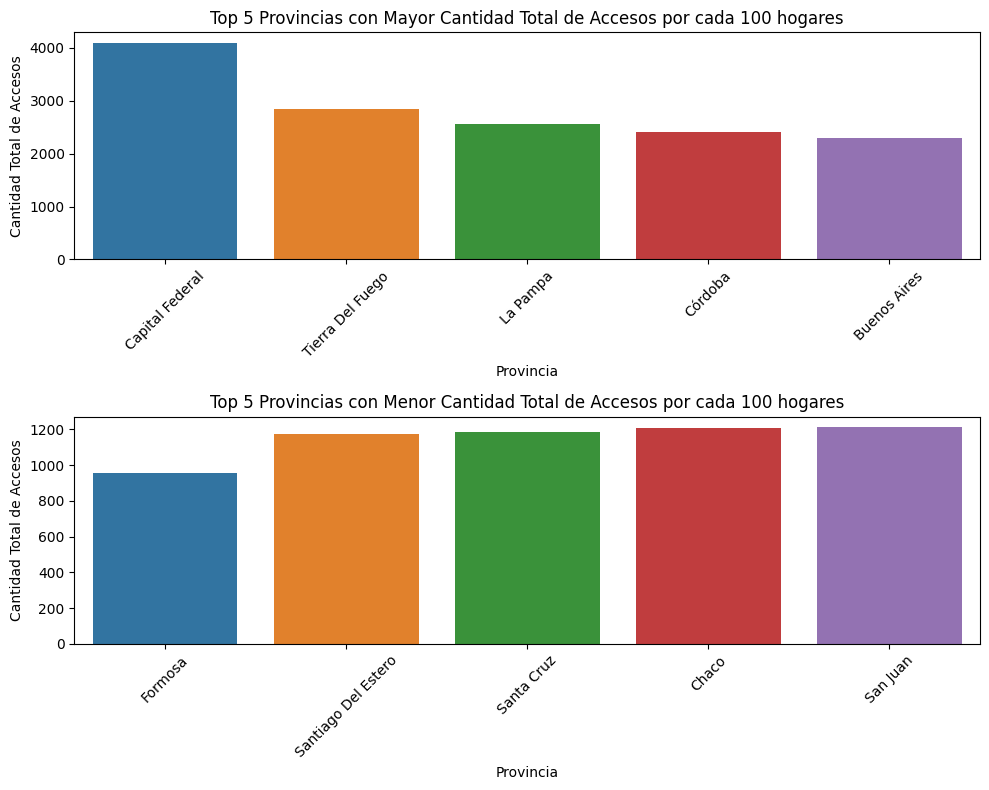

In [87]:
# Se calcula la suma total de accesos por provincia
total_accesos_por_provincia = df_Accesos_Cien.groupby('Provincia')['Accesos por cada 100 hogares'].sum().sort_values()

# Se obtiene los top 5 con la mayor cantidad total de accesos y los top 5 con la menor cantidad total de accesos
top_mayor = total_accesos_por_provincia.nlargest(5).index.tolist()
top_menor = total_accesos_por_provincia.nsmallest(5).index.tolist()

# Se filtra el df para obtener los datos de las provincias del top 5
datos_top_mayor = df_Accesos_Cien[df_Accesos_Cien['Provincia'].isin(top_mayor)]
datos_top_menor = df_Accesos_Cien[df_Accesos_Cien['Provincia'].isin(top_menor)]

# Se crea dos gráficos barplot para mostrar ambos top 5´s
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.barplot(data=datos_top_mayor, x='Provincia', y='Accesos por cada 100 hogares', estimator=sum, errorbar=None, order=top_mayor)
plt.title('Top 5 Provincias con Mayor Cantidad Total de Accesos por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total de Accesos')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(data=datos_top_menor, x='Provincia', y='Accesos por cada 100 hogares', estimator=sum, errorbar=None, order=top_menor)
plt.title('Top 5 Provincias con Menor Cantidad Total de Accesos por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total de Accesos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Basado en los dos top 5´s anteriores, ahora se va a utilizar el dataset de historico de velocidad<br>
y se va a presentar la evolución de la velocidad por los años para dos gráficas distintas una para <br>
el top 5 con mayor cantidad de accesos y otra para el de menor cantidad.

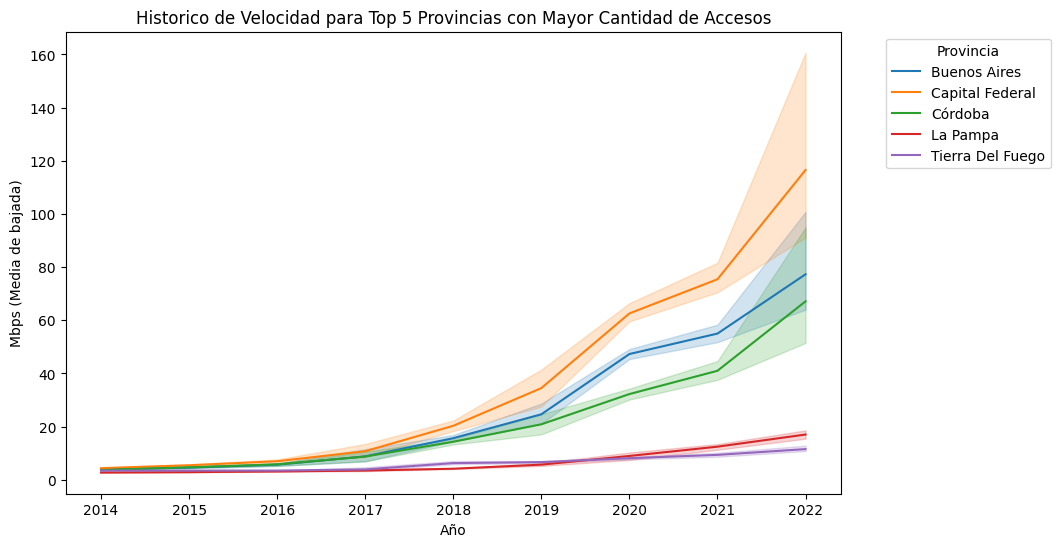

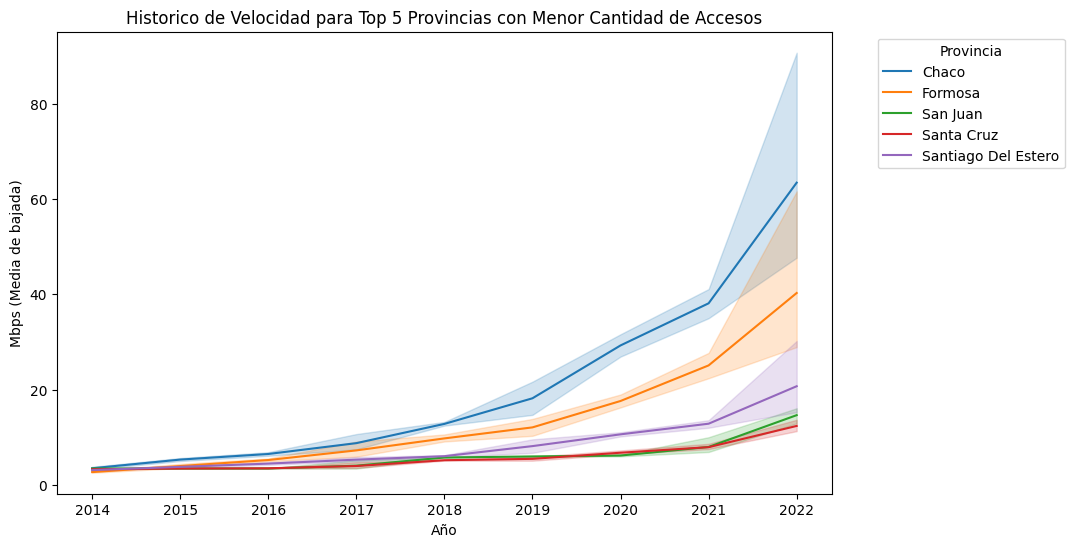

In [88]:
# Se filtran las provincias del top 5 con mayor cantidad de accesos
top_mayor_provincias = ['Capital Federal', 'Tierra Del Fuego', 'La Pampa', 'Córdoba', 'Buenos Aires']
datos_top_mayor_vel = df_Historico_Vel[df_Historico_Vel['Provincia'].isin(top_mayor_provincias)]

# Gráfico del Top 5 de provincias con mayor cantidad de accesos
plt.figure(figsize=(10, 6))

# Se crea un gráfico lineplot para las provincias del top 5 con mayor cantidad de accesos
sns.lineplot(data=datos_top_mayor_vel, x='Año', y='Mbps (Media de bajada)', hue='Provincia', palette='tab10')
plt.title('Historico de Velocidad para Top 5 Provincias con Mayor Cantidad de Accesos')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Se filtra las provincias del top 5 con menor cantidad de accesos
top_menor_provincias = ['Formosa', 'Santiago Del Estero', 'Santa Cruz', 'Chaco', 'San Juan']
datos_top_menor_vel = df_Historico_Vel[df_Historico_Vel['Provincia'].isin(top_menor_provincias)]

# Gráfico del Top 5 de provincias con menor cantidad de accesos
plt.figure(figsize=(10, 6))

# Se crea el gráfico lineplot para las provincias del top 5 con menor cantidad de accesos
sns.lineplot(data=datos_top_menor_vel, x='Año', y='Mbps (Media de bajada)', hue='Provincia', palette='tab10')
plt.title('Historico de Velocidad para Top 5 Provincias con Menor Cantidad de Accesos')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

En las gráficas anteriores, las líneas muestran un aumento general en la velocidad de Internet con <br> 
el tiempo para todas las provincias, con algunas fluctuaciones. Pero en términos generales, se puede <br> 
observar por ejemplo para Tierra de fuego que está en el top 2 de cantidad de accesos, pero tiene <br>
las menores velocidades a lo largo de la gráfica de tiempo ( observar la etiqueta de colores <br>
en el gráfico de velocidades que tiene como referencia arriba a la derecha). Por otra parte, se puede <br>
ver que Chaco que tiene menos cantidad de accesos, tiene velocidades similares a Buenos Aires o Córdoba.

Ahora se presentaran unos gráficos sobre los datos de Telefonía para obtener un poco de contexto<br>
Similar a lo que se hizo para internet, se presentarán dos Top 5 para mayor y menor cantidad de accesos

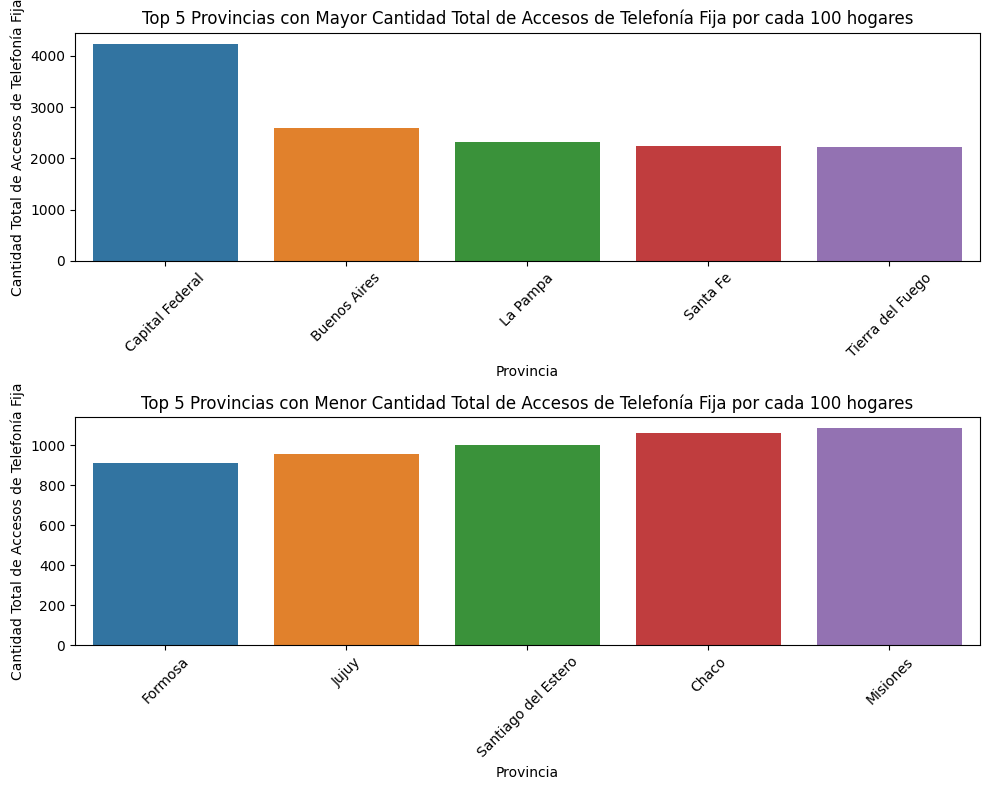

In [89]:
# Se calcula la suma total de accesos de telefonía por provincia
total_accesos_por_provincia_tel = df_Accesos_Tel.groupby('Provincia')['Accesos telefonía fija por cada 100 hogares'].sum().sort_values()

# Se obtiene los top 5 con la mayor cantidad total de accesos de telefonía y los top 5 con la menor cantidad total de accesos de telefonía
top_mayor_tel = total_accesos_por_provincia_tel.nlargest(5).index.tolist()
top_menor_tel = total_accesos_por_provincia_tel.nsmallest(5).index.tolist()

# Se filtra el df para obtener los datos de las provincias del top 5 de accesos de telefonía
datos_top_mayor_tel = df_Accesos_Tel[df_Accesos_Tel['Provincia'].isin(top_mayor_tel)]
datos_top_menor_tel = df_Accesos_Tel[df_Accesos_Tel['Provincia'].isin(top_menor_tel)]

# Se crea dos gráficos barplot para mostrar ambos top 5´s de accesos de telefonía
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.barplot(data=datos_top_mayor_tel, x='Provincia', y='Accesos telefonía fija por cada 100 hogares', estimator=sum, errorbar=None, order=top_mayor_tel)
plt.title('Top 5 Provincias con Mayor Cantidad Total de Accesos de Telefonía Fija por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total de Accesos de Telefonía Fija')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(data=datos_top_menor_tel, x='Provincia', y='Accesos telefonía fija por cada 100 hogares', estimator=sum, errorbar=None, order=top_menor_tel)
plt.title('Top 5 Provincias con Menor Cantidad Total de Accesos de Telefonía Fija por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total de Accesos de Telefonía Fija')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Posteriormente, se presentan las gráficas de ingresos tanto para Telefonía como para Internet

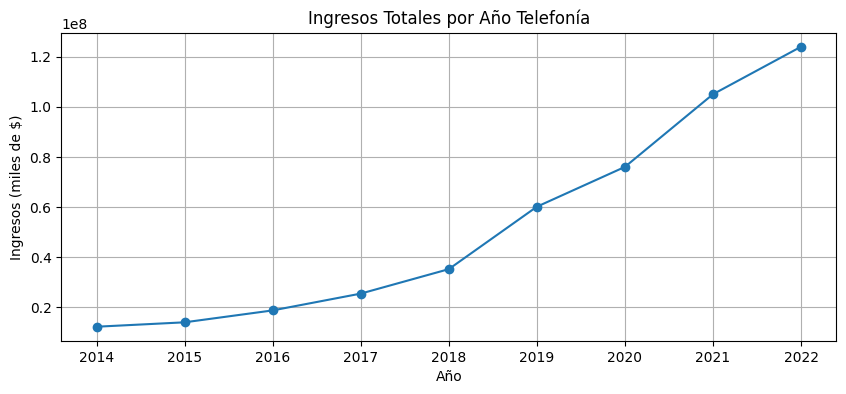

In [90]:
# Crear una lista con los años únicos presentes en tu dataset
años = sorted(set(df_ingresos_Tel['Año']))

# Calcular los ingresos totales por año
ingresos_por_año = [df_ingresos_Tel[df_ingresos_Tel['Año'] == año]['Ingresos (miles de $)'].sum() for año in años]

# Crear la gráfica de línea
plt.figure(figsize=(10, 4))
plt.plot(años, ingresos_por_año, marker='o', linestyle='-')
plt.title('Ingresos Totales por Año Telefonía')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de $)')
plt.grid(True)
plt.show()

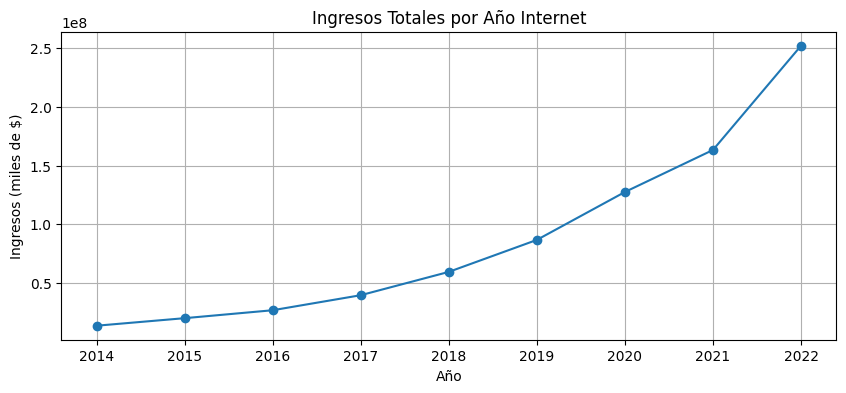

In [91]:
# Crear una lista con los años únicos presentes en tu dataset
años = sorted(set(df_ingresos_internet['Año']))

# Calcular los ingresos totales por año
ingresos_por_año = [df_ingresos_internet[df_ingresos_internet['Año'] == año]['Ingresos (miles de pesos)'].sum() for año in años]

# Crear la gráfica de línea
plt.figure(figsize=(10, 4))
plt.plot(años, ingresos_por_año, marker='o', linestyle='-')
plt.title('Ingresos Totales por Año Internet')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de $)')
plt.grid(True)
plt.show()

Se puede observar que los ingresos para internet son superiores y que en cuestion de tendencias <br>
la tendencia de internet tiene una pendiente con un angulo mayor para 2021-2022 que la pendiente <br>
que tiene en ese mismo rango la telefonía

Con base en el EDA y toda la información que se analizó, se decidió tomar el siguiente enfoque para la narrativa que se va a seguir durante los dashboards y el resto del proyecto: Principalmente, el enfoque se basa en que, los servicios con mayor cantidad de reclamos son los servicios de Internet y Telefonía. Tomando en cuenta la cantidad de reclamos y considerando que Internet cuenta con una mayor cantidad de ingresos por este servicio, se decidió presentar KPIs relacionados con estos dos servicios y tomar el enfoque de la mejora de los mismos. Se presentarán KPIs que serán enfocados acorde con esta narrativa.<br>
Se continua con el análisis y los dashboards en Power BI...